In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
X = dataset.iloc[:,:]
y = dataset.iloc[:,8]

In [14]:
X=X.drop('median_house_value', axis=1)

In [15]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [17]:
# There can be a possibility of data leakage so we will split first and then apply feature engineering

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 9), (2064, 9), (18576,), (2064,))

## Missing Values

In [20]:

features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 ]
for feature in features_nan:
    print("{}: {}% missing values".format(feature, np.round(dataset[feature].isnull().mean(),4)))

total_bedrooms: 0.01% missing values


In [21]:
#Replace the missing nan values

for feature in features_nan:
     ##We will replace by using median
    median_value = dataset[feature].median()
    print(median_value)
    ##create a new feature to capture nan values
    dataset[feature+'nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_value, inplace = True)

dataset[features_nan].isnull().sum()

435.0


total_bedrooms    0
dtype: int64

In [22]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


## Numerical Features

In [23]:
#list of numerical variables

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


## Relation between dependent and independent variable

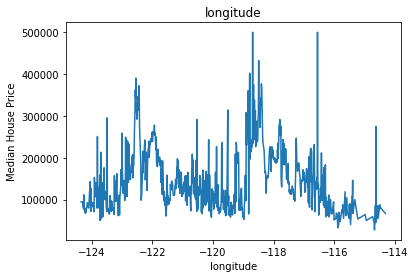

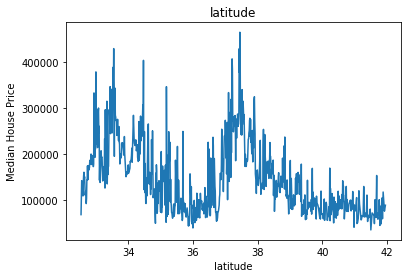

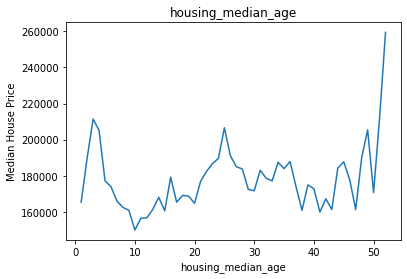

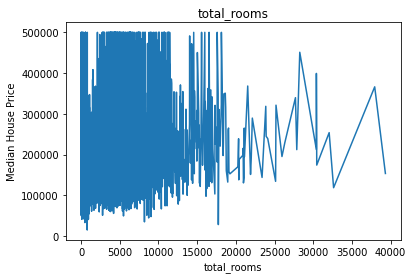

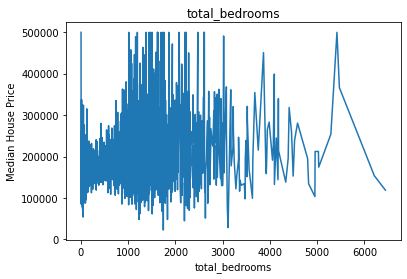

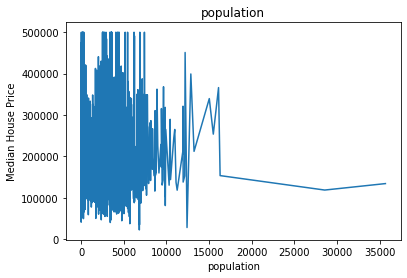

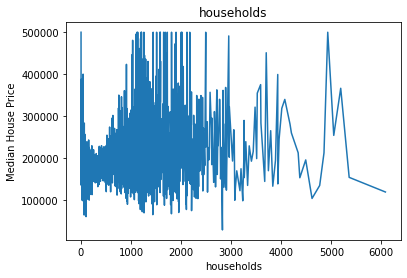

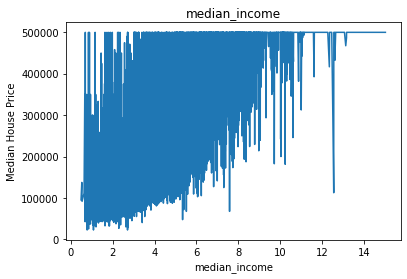

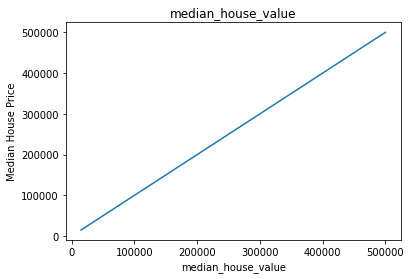

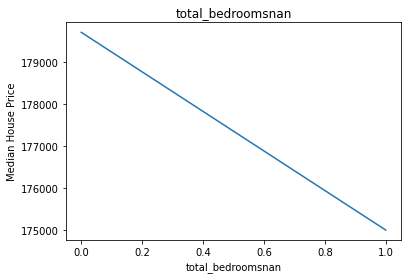

In [684]:
for feature in numerical_features:
    dataset.groupby(feature)['median_house_value'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title(feature)
    plt.show()

## Discrete Feature

In [24]:
## Numerical variables are usually of 2 types:
# Continuous variable and Discrete variable

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [25]:
discrete_feature

['total_bedroomsnan']

## Continuous Feature

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature count {}".format(len(continuous_feature)))

Continuous feature count 9


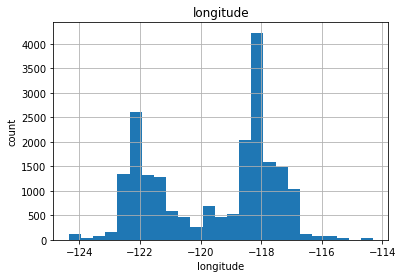

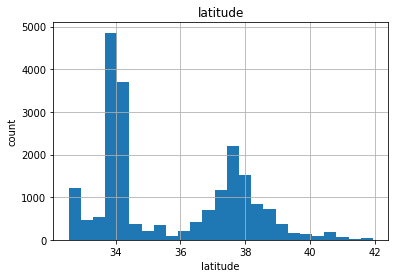

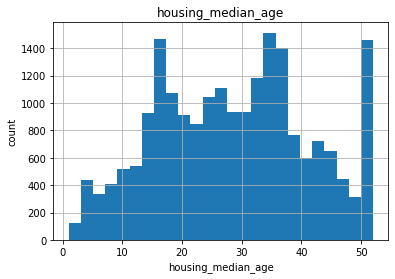

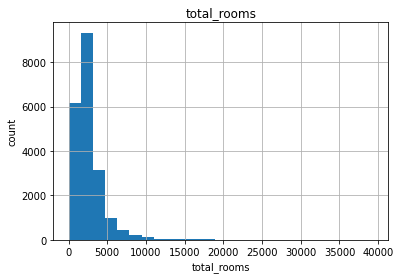

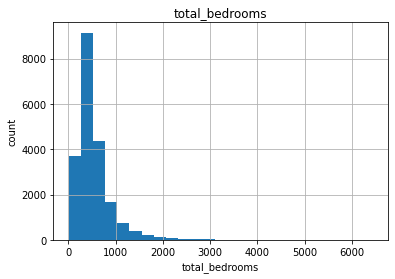

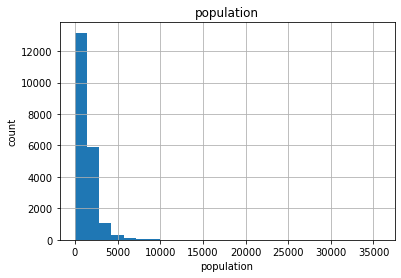

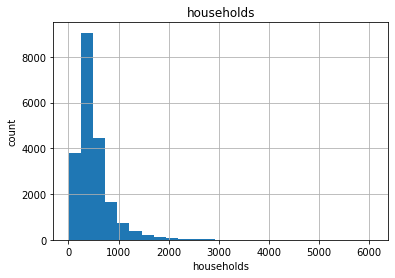

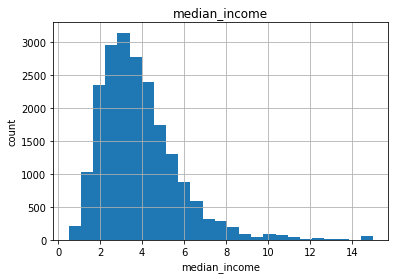

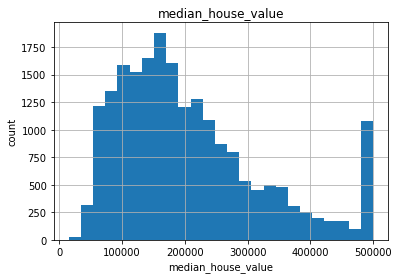

In [688]:
#Analyse continuous variable by creating histograms

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

## Outliers

/home/ajay/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


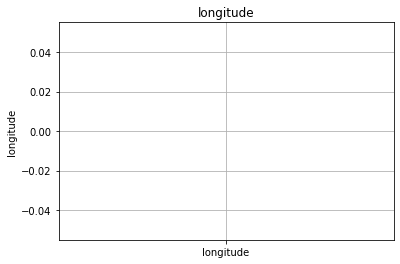

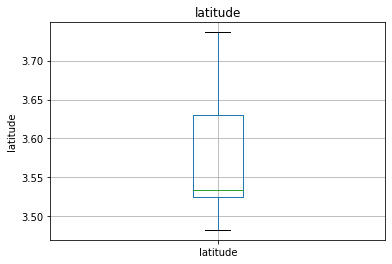

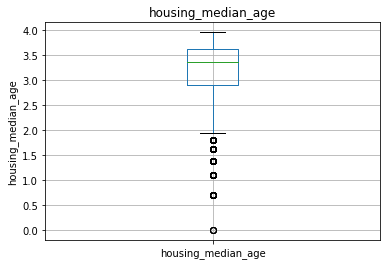

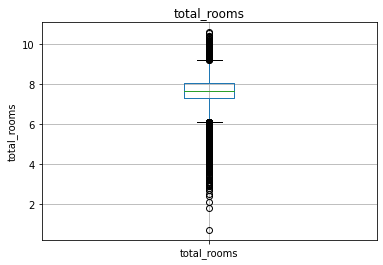

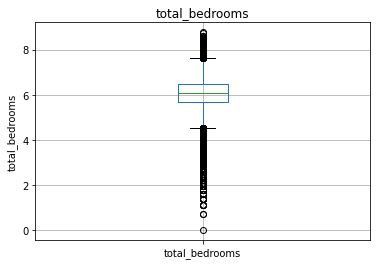

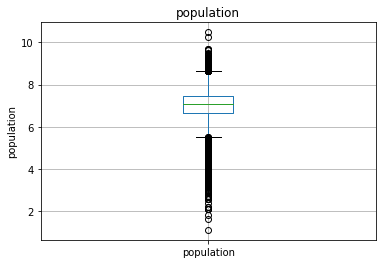

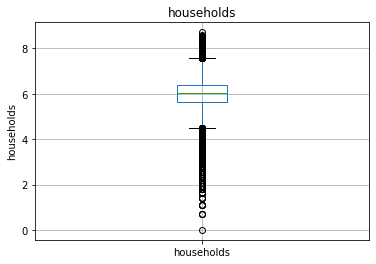

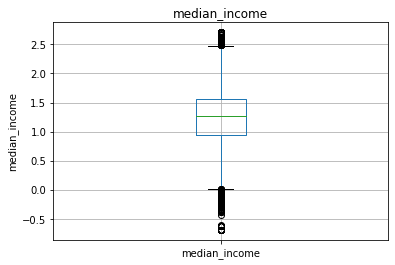

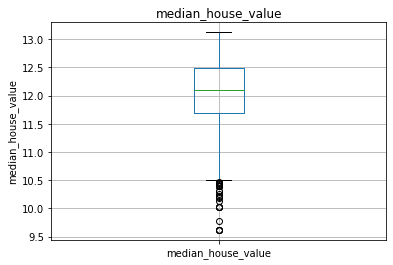

In [27]:
##Only for continuous variable, can't be used for categorical variable

for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Handling Rare Categorical Feature

In [28]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [29]:
categorical_features

['ocean_proximity']

In [30]:
temp=dataset.groupby(categorical_features)['median_house_value'].count()/len(dataset)
print(temp)
temp_df=temp[temp>0.01].index
print(temp_df)
dataset[categorical_features]=np.where(dataset[categorical_features].isin(temp_df),dataset[categorical_features],'Rare_var')

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
ISLAND        0.000242
NEAR BAY      0.110950
NEAR OCEAN    0.128779
Name: median_house_value, dtype: float64
Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object', name='ocean_proximity')


In [31]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [32]:
for feature in categorical_features:
    labels_ordered=dataset.groupby(feature)['median_house_value'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)


## Correlation

In [33]:
dataset.head()
dataset.drop(['total_bedroomsnan'], axis = 1)
dataset.iloc[:,0:].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.271730,0.004880
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.007695,-0.006325
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.295012,0.005047
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.031586,-0.003375
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.010067,-0.024441
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.039415,0.004648
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.012873,0.002760
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.163755,-0.002566
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.397251,-0.000740
ocean_proximity,-0.271730,0.007695,0.295012,-0.031586,-0.010067,-0.039415,0.012873,0.163755,0.397251,1.000000,0.004100


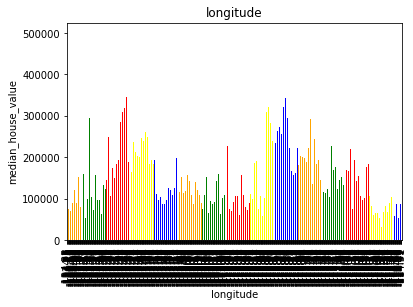

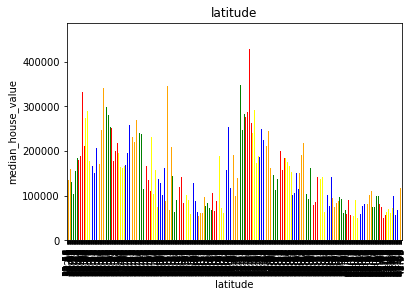

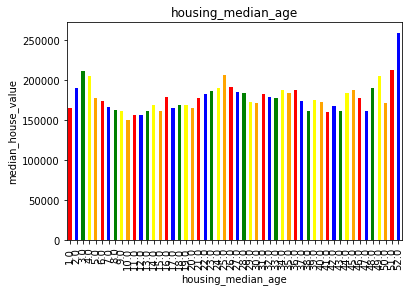

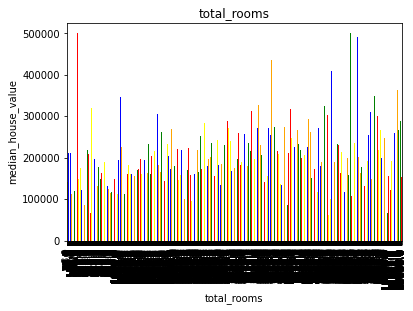

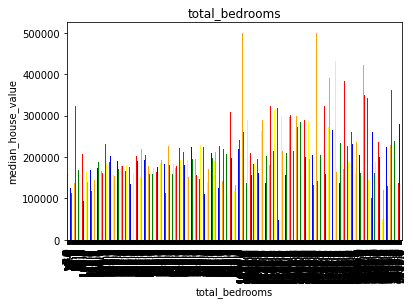

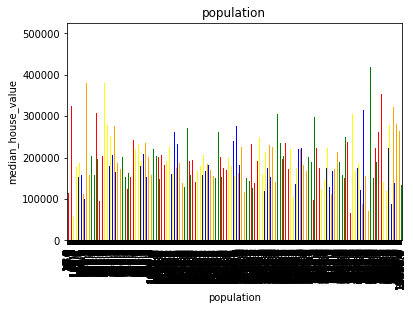

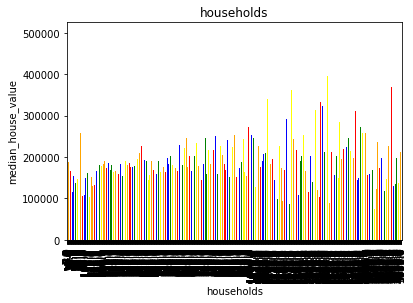

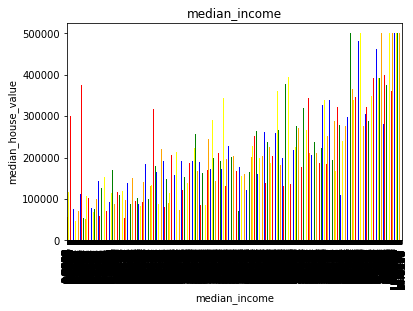

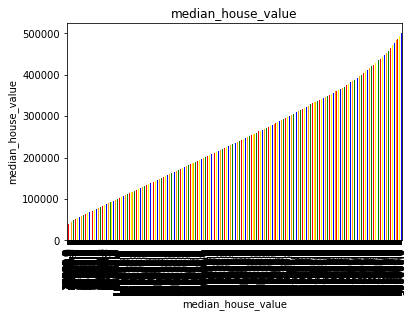

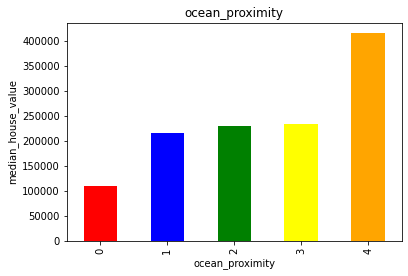

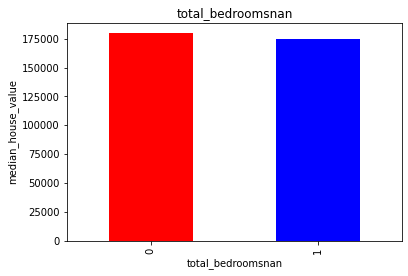

In [521]:
for feature in dataset.columns:
    data=dataset.copy()
    data.groupby(feature)['median_house_value'].median().plot.bar(color=['red', 'blue', 'green', 'yellow', 'orange'])
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()

##  Feature Scaling

In [36]:
feature_scale=[feature for feature in dataset.columns if feature not in ['median_house_value']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

ValueError: could not convert string to float: 'INLAND'

In [35]:

data=pd.concat([dataset[['median_house_value']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                 axis=1)

In [21]:
data.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedroomsnan
0,452600.0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75,0.0
1,358500.0,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75,0.0
2,352100.0,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75,0.0
3,341300.0,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,0.0
4,342200.0,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75,0.0


In [22]:
data.to_csv('X_train.csv',index=False)

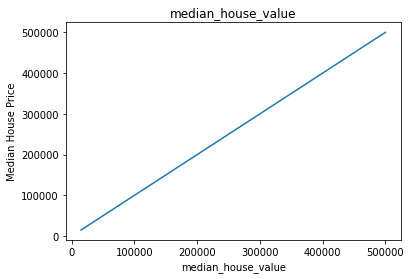

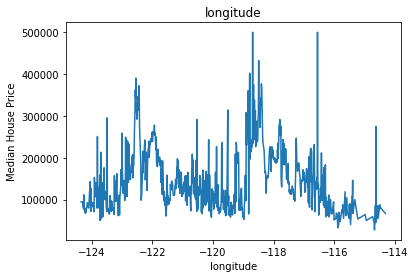

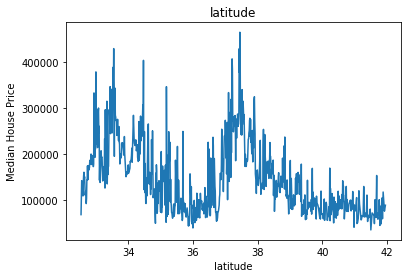

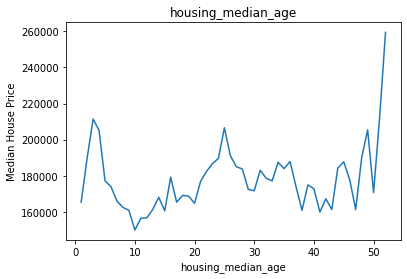

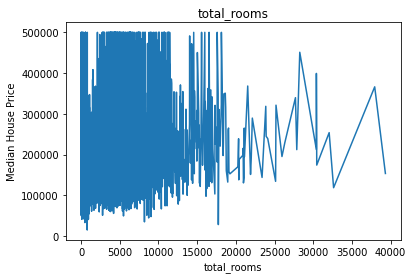

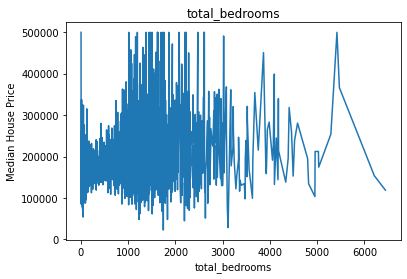

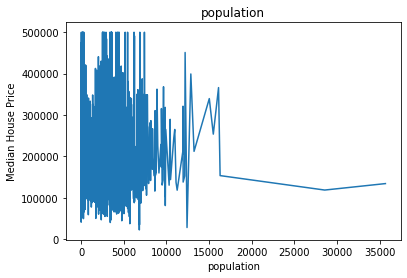

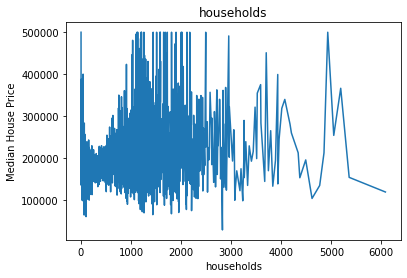

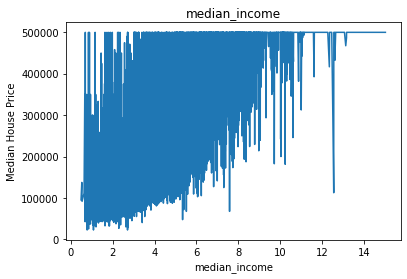

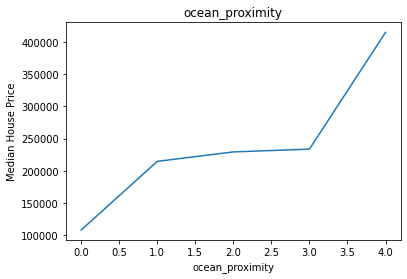

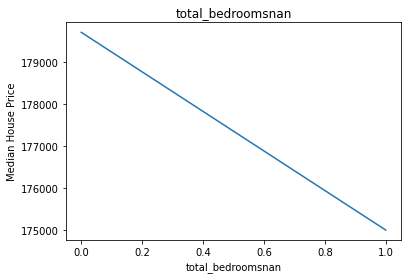

In [23]:
for feature in data.columns:
    dataset.groupby(feature)['median_house_value'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title(feature)
    plt.show()

In [24]:
data.to_csv('X_train_bkp.csv', index=False)

In [25]:
data_load_bkp = pd.read_csv('X_train_bkp.csv')

In [26]:
data_load=data_load_bkp.copy()

## Removing Outliers

In [27]:
from scipy import stats
z=np.abs(stats.zscore(data_load))
print(z)

[[2.12963148 1.32783522 1.05254828 ... 2.34476576 2.08278032 0.10065123]
 [1.31415614 1.32284391 1.04318455 ... 2.33223796 2.08278032 0.10065123]
 [1.25869341 1.33282653 1.03850269 ... 1.7826994  2.08278032 0.10065123]
 ...
 [0.99274649 0.8237132  1.77823747 ... 1.14259331 1.09543835 0.10065123]
 [1.05860847 0.87362627 1.77823747 ... 1.05458292 1.09543835 0.10065123]
 [1.01787803 0.83369581 1.75014627 ... 0.78012947 1.09543835 0.10065123]]


In [28]:
print(np.where(z>5))
data_load=data_load[(z<=5).all(axis=1)]

(array([  290,   341,   511,   538,   563,   570,   570,   570,   570,
         576,   696,   738,   864,   864,   864,   864,   865,   865,
         865,   865,   871,   871,   871,   871,   922,   922,   922,
         922,  1010,  1010,  1010,  1010,  1021,  1060,  1060,  1060,
        1060,  1097,  1277,  1350,  1456,  1493,  1508,  1560,  1560,
        1560,  1566,  1583,  1606,  1642,  1642,  1700,  1700,  2028,
        2115,  2301,  2311,  2323,  2334,  2351,  2412,  2420,  2578,
        2608,  2647,  2826,  2963,  2963,  3024,  3177,  3328,  3354,
        3376,  3482,  3485,  3529,  3603,  3603,  3603,  3621,  3648,
        3648,  3648,  3721,  3778,  3912,  3921,  3942,  3958,  3981,
        3981,  3981,  3996,  3996,  4035,  4035,  4035,  4035,  4042,
        4043,  4046,  4186,  4253,  4266,  4266,  4279,  4309,  4352,
        4391,  4447,  4496,  4579,  4579,  4579,  4591,  4600,  4604,
        4605,  4606,  4616,  4626,  4629,  4667,  4678,  4691,  4738,
        4743,  4744

In [29]:
data_load.shape


(20184, 11)

In [30]:
# There can be a possibility of data leakage so we will split first and then apply feature engineering

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_load, data_load['median_house_value'], test_size=0.1, random_state=0)


In [31]:
X_test=X_test.iloc[:,1:]
X_train=X_train.iloc[:,1:]

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18165, 10), (18165,), (2019, 10), (2019,))

In [33]:
y=data_load.iloc[:,1]

## Linear Regression

In [34]:
data=data_load[['housing_median_age','population', 'total_rooms', 'latitude','longitude' , 'total_bedrooms','households' ,'median_income', 'ocean_proximity', 'median_house_value']]
data.head()

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(data, data['median_house_value'], test_size=0.04, random_state=0)
X_train=X_train1.iloc[:,:-1]
X_test=X_test1.iloc[:,:-1]
X_train

,housing_median_age,population,total_rooms,latitude,longitude,total_bedrooms,households,median_income,ocean_proximity
5115,0.745098,0.042630,0.071214,0.150903,0.602590,0.095748,0.086828,0.148405,0.25
13592,0.666667,0.053729,0.061651,0.166844,0.703187,0.110801,0.096201,0.072840,0.00
17084,0.705882,0.044396,0.035633,0.523911,0.214143,0.057107,0.054267,0.160405,0.75
6234,0.607843,0.038314,0.057226,0.161530,0.637450,0.064246,0.067423,0.284913,0.25
10149,0.509804,0.010651,0.021034,0.144527,0.641434,0.017536,0.021707,0.607757,0.25
...,...,...,...,...,...,...,...,...,...
13428,0.156863,0.088371,0.109009,0.165781,0.687251,0.157666,0.147838,0.157432,0.00
20089,0.392157,0.032848,0.125184,0.583422,0.408367,0.149752,0.074494,0.168674,0.00
10069,0.490196,0.025281,0.050511,0.721573,0.413347,0.058659,0.052623,0.226493,0.00
11038,0.313725,0.032989,0.075512,0.137088,0.652390,0.054159,0.056734,0.732604,0.25


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lin_regressor = LinearRegression()
#parameters = {'alpha':[30, 35,36,37,38,39, 40, 45], 'max_iter':[1700]}
#lin_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
mse = cross_val_score(lin_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)
lin_regressor.fit(X_train, y_train)
#print(lin_regressor.best_params_) #best_params_ gives which lambda value was more suitable
#print(lin_regressor.best_score_)
acc=lin_regressor.score(X_test, y_test)
print('acc: {}'.format(int(round(acc*100))))
preds = lin_regressor.predict(X_test)
preds.shape

-4593596324.036077
acc: 68


(808,)

In [36]:
y_test

4948     108000.0
7735     191900.0
3654     175500.0
13474    125800.0
17578    293000.0
           ...   
14987    154400.0
8099     156900.0
8627     495500.0
1026     119000.0
3303      69000.0
Name: median_house_value, Length: 808, dtype: float64

(12586.844785543468, 1045480.2052741317, 89125.0938133746, 1122018.4543019629)

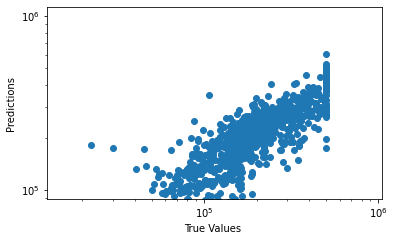

In [37]:
g=plt.scatter(y_test, preds)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')


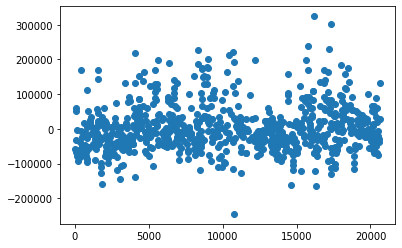

In [38]:
g=plt.plot(y_test - preds,marker='o',linestyle='')


In [39]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, preds)
print(error)
from sklearn.metrics import r2_score
error_r2 = r2_score(y_test, preds)
print(error_r2)

4675030221.278161
0.6816527087683271


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

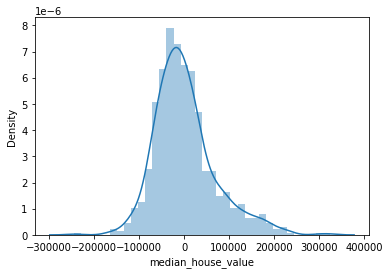

In [40]:
import seaborn as sns

sns.distplot(y_test-preds)

## Lasso Regression

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((19376, 9), (19376,), (808, 9), (808,))

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters = {'alpha':[0.01]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_) #best_params_ gives which lambda value was more suitable
print(lasso_regressor.best_score_)


{'alpha': 0.01}
-4593596130.2552395


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

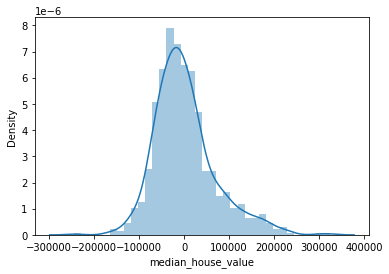

In [43]:
preds1 = lasso_regressor.predict(X_test)
sns.distplot(y_test-preds1)

In [44]:
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(y_test, preds1)
print(error1)
from sklearn.metrics import r2_score
error_r21 = r2_score(y_test, preds1)
print(error_r21)

4675008443.869885
0.6816541917061063


## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge


ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)
preds2=ridge_regressor.predict(X_test)


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

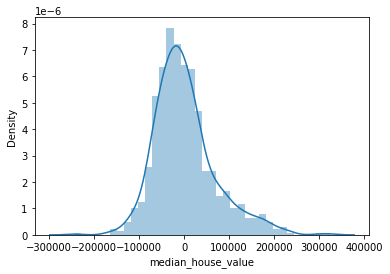

In [46]:
sns.distplot(y_test-preds2)

In [47]:
error2 = mean_squared_error(y_test, preds2)
print(error2)
error_r22 = r2_score(y_test, preds2)
print(error_r22)

4673826023.547712
0.6817347088982622


## Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=0)

In [127]:
preds3=regressor.predict(X_test)

/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

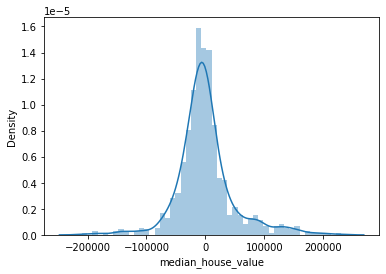

In [128]:
sns.distplot(y_test-preds3)

In [129]:
error3 = mean_squared_error(y_test, preds3)
print(error3)
error_r23 = r2_score(y_test, preds3)
print(error_r23)

2391530214.447729
0.837148183084903


## XGBOOST Regressor

In [52]:
import xgboost as xg
xgb_r = xg.XGBRegressor(learning_rate=0.15, num_parallel_tree= 2, n_estimators=150, max_depth=15, objective ='reg:linear', reg_lambda= 2, seed = 123)
xgb_r.fit(X_train, y_train)

[15:59:41] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=2,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
preds4 = xgb_r.predict(X_test)

/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

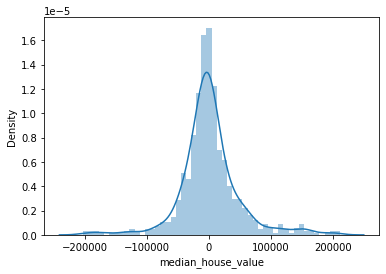

In [54]:
sns.distplot(y_test-preds4)

In [55]:
error4 = mean_squared_error(y_test, preds4)
print(error4)
error_r24 = r2_score(y_test, preds4)
print(error_r24)

2395736343.2123213
0.8368617657495272


## Neural Network Regressor

In [130]:
import tensorflow
#tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [134]:
model = Sequential()
model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_40 (Dense)             (None, 2670)              56070     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 2671      
Total params: 58,941
Trainable params: 58,941
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.fit(X_train, y_train, epochs=20, batch_size=150, verbose=1, validation_split=0.9)
predictions = model.predict(X_test)

Epoch 1/20
13/13 [==============================] - 1s 31ms/step - loss: 55134699520.0000 - mse: 55134699520.0000 - mae: 205020.2031 - val_loss: 55313367040.0000 - val_mse: 55313367040.0000 - val_mae: 205586.4062
Epoch 2/20
13/13 [==============================] - 0s 20ms/step - loss: 55133986816.0000 - mse: 55133986816.0000 - mae: 205018.4844 - val_loss: 55312166912.0000 - val_mse: 55312166912.0000 - val_mae: 205583.5156
Epoch 3/20
13/13 [==============================] - 0s 21ms/step - loss: 55132053504.0000 - mse: 55132053504.0000 - mae: 205013.8438 - val_loss: 55309123584.0000 - val_mse: 55309123584.0000 - val_mae: 205576.2344
Epoch 4/20
13/13 [==============================] - 0s 20ms/step - loss: 55127654400.0000 - mse: 55127654400.0000 - mae: 205003.3125 - val_loss: 55302729728.0000 - val_mse: 55302729728.0000 - val_mae: 205561.0312
Epoch 5/20
13/13 [==============================] - 0s 21ms/step - loss: 55118979072.0000 - mse: 55118979072.0000 - mae: 204982.5781 - val_loss: 552

In [136]:
error_r25 = r2_score(y_test, predictions)
print(error_r25)

-2.8162998953310763
